# Contents

- Curse of Dimensionality
- Projection
- Manifold Learning
- PCA
- Random Projection
- Locally Linear Embedding (LLE)
- Other Dimensionality Reducntion Techniques

## Introduction

- Many Machine learning problems involves thousands or even millions of features for each training instance
- As the number of features(dimension) increases, the volume of space increases exponentially and data points became more sparse (increasing the distance b/w data points)
  - which make it much harder to find a good space solution, this problem often referred as the **Curse of Dimesnionality**
  - **Example**: MINST Images, the pixels on the image boundary are almost white, so we can drop these pixels from training set, without losing much information
- Reducing dimensionality does cause some information loss, just like compressing an image to jpeg can degrade its quality.
   - Even though it will speed up the training, it may make your systems perform slightly worse
   - it also make pipelines a bit more complex and thus harder to maintain
   - **Therefore, Its recommended to first try to train your system with the original data before considering dimensionality reduction**.
      - in some cases reducing the dimensionality of the training data may filter out some nosie and unnecessary detials and thus result in higher performance, but in general it won't, it will just speed up training
      
- Apart from speeding up training, Dimensionality Reduction is also extremly useful for data visulaization
   - reducing the number of dimensions down to two or three makes it possible to plot a condensed view of high dimensional training set on graph, 
   - often gain some important insights by visually detecting patterns such as clusters.
   
### ------
   
- **Two Main Approcaches of Dimensionality Reduction**
    - Projection
    - Manifold Learning
    
- **Three of the most popular dimensionality reduction techniques:**
   - PCA 
   - random projection
   - locally linear embedding

# 1. Curse of Dimensionality 

- More Dimesnion the Training set has , the greater the risk of overfitting it
- one way to treat the Dimensionality Problem, is by increasing the amount of training data
   - But There is a problem, with increasing the number of dimension (feature), the amount of data (rows/observation) need to be increase is very very fast.
   - **example**:
       - if we have 100 features and each can take values between 0 and 1, 
       - we would need an unimaginably huge amount of data to have enough training examples that are close to each other. 
       - In fact, we need more data points than there are atoms in the entire universe, just to make sure the data is dense enough for the model to learn effectively.
       
- **In other words, for high-dimensional data, just adding more examples isn't a practical solution because we will need an impossibly large amount of data to cover all the possibilities**

# 2. Projection

- **Projection** in the context of data science, machine learning, or mathematics refers to the **process of transforming data from a high-dimensional space to a lower-dimensional space while retaining as much relevant information as possible**. 
- It's essentially a way to "flatten" or "simplify" the data so it's easier to work with or visualize


**Key Ideas**:
- **Dimensionality Reduction**: Projection is often used to reduce the number of features (dimensions) in the data. For example, in a dataset with 100 features, a projection could map that data to just 2 or 3 dimensions for easier analysis, visualization, or faster computation.

- **Preserving Information**: The goal is to maintain the most important patterns or structures in the data while removing irrelevant or redundant information

**Analogy**
- Imagine you have a 3D object, like a cube, and you shine a light on it. The shadow of the cube on the wall is a 2D projection of the 3D cube. 
- The shadow gives you a simpler, lower-dimensional view of the cube, but you can still get a sense of its structure from the shadow.


**Eamples**
- **Principal Component Analysis (PCA)**: This is a common projection technique that finds the directions (called principal components) along which the data varies the most. 
  - It projects the data onto these directions to reduce the number of dimensions.

- **t-SNE and UMAP**: often used to reduce high-dimensional data into 2D or 3D for visualization purposes, but they are not limited to just 2D or 3D. 
  - we can choose the number of dimensions we had like to reduce to, whether it’s 2, 3, or even higher, depending on your goals



# 3 Manifold Learning

**Manifold learning** is a type of unsupervised machine learning technique used for dimensionality reduction. 
- **It assumes that high-dimensional data (e.g., data with many features) lies on a lower-dimensional surface, called a manifold, within that high-dimensional space**. 
- **The goal of manifold learning** is to discover and map this lower-dimensional structure while preserving the important geometric and topological properties of the data

- example unrolling the swill roll toy dataset

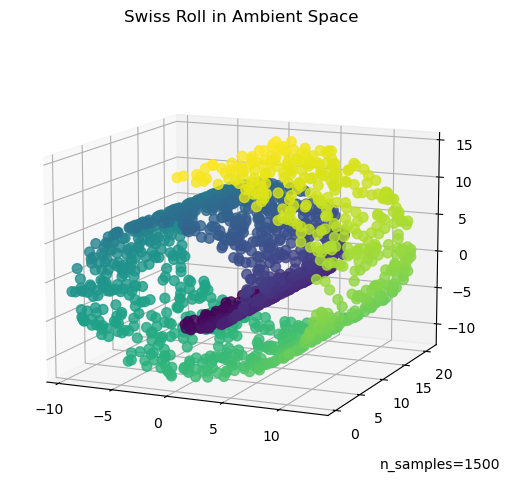

In [1]:
import matplotlib.pyplot as plt

from sklearn import datasets, manifold

sr_points, sr_color = datasets.make_swiss_roll(n_samples=1500, random_state=0)

#--------

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    sr_points[:, 0], sr_points[:, 1], sr_points[:, 2], c=sr_color, s=50, alpha=0.8
)
ax.set_title("Swiss Roll in Ambient Space")
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples=1500", transform=ax.transAxes)


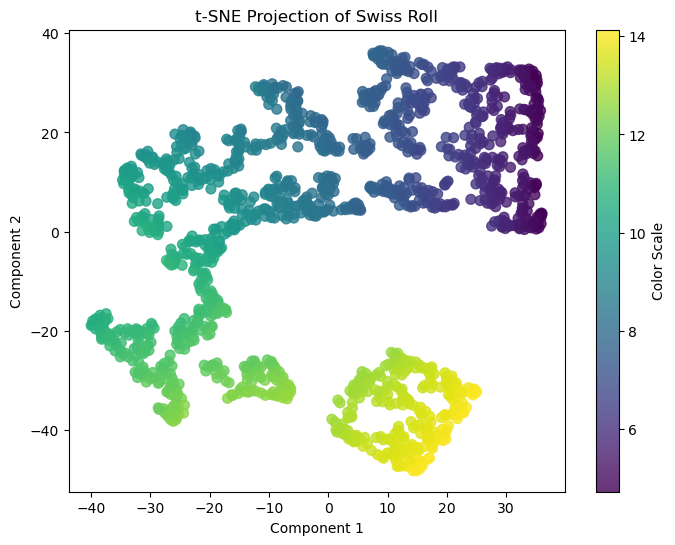

In [2]:
from sklearn.manifold import TSNE

# 2D Projection using t-SNE
tsne = TSNE(n_components=2, random_state=0)
sr_points_2d_tsne = tsne.fit_transform(sr_points)

# Create a figure for t-SNE plot
plt.figure(figsize=(8, 6))
plt.scatter(sr_points_2d_tsne[:, 0], sr_points_2d_tsne[:, 1], c=sr_color, s=50, alpha=0.8)
plt.title("t-SNE Projection of Swiss Roll")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(label='Color Scale')
plt.show()

- **d-dimensional manifold** is a part of an **n-dimensional space** (where d < n) that locally resembles a **d-dimensional hyperplane**. In the case of the Swiss roll, d = 2 and n = 3: it locally resembles a 2D plane, but it is rolled in the third dimension.

- **reducing the dimensionality of your training set before training a model will usually speed up training, but it may not always lead to a better or simpler solution; it all depends on the dataset.**

### ----
**When to Use Manifold Learning**:
- When you have high-dimensional data that you suspect has an underlying non-linear structure.
- When traditional dimensionality reduction methods like PCA (which only captures linear relationships) fail to reveal meaningful patterns in the data.
- For visualizing complex datasets (like word embeddings, image data, or genetic data) in 2D or 3D.


### ----

**Practical Applications**:
- Image and Video Processing: Reducing high-dimensional image data to lower dimensions for analysis.
- Natural Language Processing (NLP): Reducing the dimensionality of word embeddings for visualization.
- Genomics: Identifying patterns and structures in genetic data.

# 4. PCA

- **Principal Component Analysis (PCA)** is a statistical technique used for dimensionality reduction while preserving as much variance (information) as possible. 
- It transforms the data into a new coordinate system defined by the **principal components, which are orthogonal axes that maximize the variance in the data**

## 4.1 PCA and Preserving Variance

- **Variance Preservation**: The primary goal of PCA is to reduce the dimensionality of a dataset while retaining as much variance as possible. 
  - PCA identifies the directions (principal components) in which the data varies the most and projects the data onto these directions.
- **Importance of Variance**: Variance is a measure of the spread of data points. By preserving variance, PCA ensures that the most significant patterns in the data remain, allowing for effective analysis and interpretation.

- projecting 2d data points in 1d line
  -  Another way to justify this choice is that it is the axis that minimizes the **mean squared distance between the original dataset and its projection onto that axis**

## 4.2 Principal Components

**Principal components are the new axes created by PCA after transforming the original dataset** 
- Each principal component is a linear combination of the original features.
- Orthogonality: **Principal components are orthogonal to each other, meaning they are uncorrelated and represent independent directions of variance in the dataset**.
- **Ordering**: The principal components are ordered by the amount of variance they capture. The first principal component captures the most variance, followed by the second, and so on.

#### Techniques for finding Principal components of a data
| Technique                     | Description                                           | Suitable For                            |
|-------------------------------|-------------------------------------------------------|-----------------------------------------|
| **Singular Value Decomposition (SVD)** | Decomposes a matrix into its singular values and vectors, used for dimensionality reduction and data compression | Data compression, noise reduction, PCA  |
| **Eigenvalue Decomposition**  | Computes principal components from the covariance matrix | Linear relationships                     |
| **Kernel PCA**                | Extends PCA to non-linear data using kernel functions  | Non-linear relationships                 |
| **Factor Analysis**           | Models observed variables as linear combinations of latent factors | Exploring underlying relationships       |
| **Independent Component Analysis (ICA)** | Extracts statistically independent components | Signal separation and independent features |


### 4.2.1 SVD 

- Singular Value Decomposition (SVD) is closely tied to Principal Component Analysis (PCA). In fact, PCA can be derived from SVD.

- When you perform SVD on a matrix A, the resulting matrices U, Σ, and V^T have specific interpretations in the context of PCA:

  - U: Contains the principal components as its columns.
  - Σ: Contains the eigenvalues (or variances) associated with each principal component.
  - V^T: Contains the eigenvectors (or loadings) of the original features corresponding to each principal component.

### -----
- **Breaking Down UΣV^T**

  - U: Each column of U represents a principal component. 
      - This is a linear combination of the original features. 
      - The columns are orthogonal, meaning they are uncorrelated.
  - Σ: This diagonal matrix contains the singular values, which are the square roots of the eigenvalues. 
     - **The larger the singular value, the more variance that principal component captures**.
  - V^T: Each row of V^T represents the loadings for a particular feature across all principal components. 
     - These loadings indicate how much each feature contributes to a given principal component.
     
### -----
- **The Role of UΣV^T in PCA**

   - Projection: The matrix multiplication UΣ projects the original data onto the principal component subspace.
   - Scaling: The diagonal matrix Σ scales the projected data according to the importance of each principal component.
   - Rotation: The matrix multiplication V^T rotates the data to align with the principal components.
   
### ---
**Singular values in SVD represent the importance or strength of each principal component**. 
  - They are essentially the square roots of the eigenvalues of the covariance matrix of the data.
  - Larger singular value: Indicates a more important principal component that captures more variance in the data.
  
**Factor loadings in SVD are the coefficients or weights that show how much each original feature contributes to a particular principal component**. They are the elements of the matrix V^T.

  - High absolute value of a loading: Indicates a strong relationship between the feature and the principal component


### -----
In essence:

- UΣV^T is a way to decompose the original data matrix A into a new representation where the columns of U are the principal components.
- The singular values in Σ determine the importance of each principal component.
- The loadings in V^T indicate how the original features contribute to each principal component.



In [3]:
import numpy as np

# Define the matrix A
A = np.array([[4, 0, 2],
              [0, 5, 0],
              [2, 0, 3]])

# Perform SVD
U, sigma, VT = np.linalg.svd(A)

print("Singular values (sigma):", sigma)

Singular values (sigma): [5.56155281 5.         1.43844719]


In [4]:
VT

array([[-7.88205438e-01,  0.00000000e+00, -6.15412209e-01],
       [-0.00000000e+00, -1.00000000e+00, -2.22044605e-16],
       [ 6.15412209e-01,  0.00000000e+00, -7.88205438e-01]])

In [5]:
U

array([[-0.78820544,  0.        ,  0.61541221],
       [ 0.        , -1.        ,  0.        ],
       [-0.61541221,  0.        , -0.78820544]])

PCA assumes that the dataset is centered around the origin. As you will see, Scikit-Learn’s PCA classes take care of centering the data for you. If you implement PCA yourself (as in the preceding example), or if you use other libraries, don’t forget to center the data first.

## 4.3 Projecting Down to d Dimension

- Once you have identified all the principal components, you can reduce the dimensionality of the dataset down to d dimensions by projecting it onto the hyperplane defined by the first d principal components.
- Selecting this hyperplane ensures that the projection will preserve as much variance as possible

In [6]:
# Scikit-Learn’s PCA class uses SVD to implement PCA,
#### note: Scikit learn PCA function, automatically take care of centering of data

from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
X2D = pca.fit_transform(A)




In [7]:
X2D

array([[-2.4161618 , -1.02520781],
       [ 4.22828315, -0.10252078],
       [-1.81212135,  1.12772859]])

## 4.4 Explained Variance Ratio

- The explained variance ratio quantifies the proportion of the dataset's total variance that is captured by each principal component. 
- It indicates how much information each component retains relative to the total variance.
- **Calculation**: The explained variance ratio can be calculated by dividing the eigenvalue of each principal component by the total sum of eigenvalues.
- **Usage**: This ratio helps in understanding the importance of each principal component and aids in deciding how many components to keep for a particular analysis

In [8]:
pca.explained_variance_ratio_

array([0.92045455, 0.07954545])

- the first principal component covers 92% variance
- the second component covers 7.9% variane
- the third PC carries very little variance/information about the original data

## 4.5 Choosing the Right number of Dimensions

- Instead of selecting a random number of dimensions for dimensionality reduction, it's often more effective to choose a threshold that ensures a certain level of variance is preserved.
- An exception to this rule, of course, is if you are reducing dimensionality for data visualization, in which case you will want to reduce the dimensionality down to 2 or 3

- **Cumulative Explained Variance**: Calculate the cumulative explained variance by each principal component. Select the number of components that captures a desired percentage of the total variance (e.g., 95%).

- **Scree Plot**: Plot the eigenvalues (or singular values) of the principal components against their index. Look for an "elbow" in the plot where the eigenvalues start to decrease rapidly. The number of components before the elbow is often a good choice.

In [9]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame = False)
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

/Users/saajanrajak/anaconda3/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [10]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95)+1 
print('d value', d)

d value 154


In [11]:
# we cab set n_components = d and run pca again, but there is better option,
## Instead of specifying number of component required, we can set n_components to be a float between 0 and 1.0

## indicating the ratio of variance , we wish to preserve

pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X_train)

In [12]:
pca.n_components_

154

- Yet another option is to plot the explained variance as a function of the number of dimensions
- There will usually be an elbow in the curve, where the explained variance stops growing fast

## 4.6 PCA for Compression

- **Data Compression**: PCA can be used for data compression by reducing the number of features while retaining most of the information. This can lead to more efficient storage and faster processing times.
- **Reconstruction**: After projection, you can reconstruct an approximation of the original data from the reduced dimensions, albeit with some loss of detail. This is useful in scenarios where storage space or computational resources are limited
   - The mean squared distance between the original data and the reconstructed data (compressed and then decompressed) is called the **reconstruction error**.



In [13]:
X_recovered = pca.inverse_transform(X_reduced)

## 4.7 Randomized PCA

- Randomized PCA is an efficient algorithm for PCA that uses randomization techniques to speed up the computation, especially for large datasets. 
- It approximates the principal components without requiring explicit computation of the covariance matrix.

- Benefits: Randomized PCA can handle high-dimensional data more quickly and is useful when working with datasets that are too large to fit into memory or for real-time applications

## 4.8 Incremental PCA

- One problem with the preceding implementations of PCA is that they require the whole training set to fit in memory in order for the algorithm to run. 
- Fortunately, incremental PCA (IPCA) algorithms have been developed that allow you to split the training set into mini-batches and feed these in one mini-batch at a time. 
- This is useful for large training sets and for applying PCA online (i.e., on the fly, as new instances arrive).

In [14]:
# lets use mnist training set to split into 100 mini batches
# aim to reduce to dimension to 154

## Important note --------
### - we must call partial_fit() for each mini batch , rather than the fit() method with whole training data

from sklearn.decomposition import IncrementalPCA

n_batches =100
inc_pca = IncrementalPCA(n_components = 154)

for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)
    
X_reduced = inc_pca.transform(X_train)

In [15]:
X_reduced.shape

(60000, 154)

- For very high-dimensional datasets, PCA can be too slow. As you saw earlier, even if you use randomized PCA its computational complexity is still O(m × d2) + O(d3), 
  - so the target number of dimensions d must not be too large. 
- If you are dealing with a dataset with tens of thousands of features or more (e.g., images), then training may become much too slow: in this case, you should consider using random projection instead

# 5. Random Projection

- Random Projection is a technique used for dimensionality reduction, which simplifies high-dimensional data by projecting it onto a lower-dimensional subspace using random matrices.
- The goal is to reduce dimensionality while preserving the structure and relationships within the data as much as possible.

**How Random Projection Works**
- **Random Matrix Generation**: A random projection uses a matrix of random values to transform the data into a lower-dimensional space. 
  - This matrix is often generated with values drawn from a **standard normal distribution or a uniform distribution**.

- **Matrix Multiplication**: The original high-dimensional data matrix X is multiplied by the random projection matrix R to project the data into the lower-dimensional space. 
  - If **X has n samples and d features**, the projection is:

                                      X′=X×R
- Where 
   - X′: is the new data matrix with reduced dimensions, and 
   - R is a random matrix of size d×k, 
      - where **k is the desired lower dimension. and (d: original Matrix feature counts)**

- **Preserving Distances**: The key to random projection's success is the Johnson-Lindenstrauss Lemma, which states that random projections can approximately preserve the distances between points in high-dimensional space, even after projecting them onto a lower-dimensional space

**Types of Random Projections**
- There are two common types of random projections:

- **Gaussian Random Projection**: The random matrix R is generated from a **Gaussian (normal) distribution with mean 0 and variance 1/k**.
  - The elements of the matrix are sampled from N(0, 1/k)
    -  where k is the target number of dimensions.
#### -- -- -- --
- **Sparse Random Projection**: The random matrix R is generated **using sparse matrices, where most elements are zero**. 
  - Sparse random projections are computationally more efficient for large datasets.

**When to Use Random Projection**
- **High-dimensional Data**: When you have data with many features (dimensions), and you want to reduce the dimensionality quickly and efficiently.

- **Faster Computation**: If PCA or other dimensionality reduction methods are too slow or computationally expensive for large datasets, random projection can be a practical alternative.

- **Preprocessing for Machine Learning**: Before feeding data into machine learning models, random projection can reduce dimensionality and potentially improve the performance of models like k-nearest neighbors, clustering algorithms, or neural networks.


#### -- -- -- -- --
**Limitations**
- **Less Control Over Variance Preservation**: Unlike PCA, which tries to preserve the maximum variance in the data, random projection does not explicitly consider variance but relies on the Johnson-Lindenstrauss Lemma for preserving distances.

- **Approximation**: Since random projection does not guarantee optimal feature selection, it might lead to a loss of information in some cases, especially if the data is highly structured.



- The Johnson-Lindenstrauss Lemma provides a theoretical guarantee for dimensionality reduction while preserving the pairwise distances between points.
- This lemma states that for any set of m points in high-dimensional space, it's possible to project the points down to a lower-dimensional space in such a way that the distances between the points are approximately preserved, with a certain tolerance ϵ. 
  - The important result is that the number of dimensions d required for the projection depends only on the number of instances m, and the tolerance ϵ, not on the original dimensionality n
  
$$
d \geq 2 \cdot \frac{1}{\epsilon^2} - 3 \cdot \frac{1}{\epsilon^3} \cdot 4 \cdot \log(m)
$$

- m = the number of data points (instances)
- ϵ = the tolerance for distortion (i.e., how much you're willing to let the distances between points change)
- d = the lower-dimensional space in which you want to embed the points

In [16]:
# using sklearn

from sklearn.random_projection import johnson_lindenstrauss_min_dim
m,e = 5_000, 0.1
d = johnson_lindenstrauss_min_dim(m, eps = e)
d
 

7300

In [17]:
# Now we can just generate a random matrix P of shape [d, n], where each item is sampled randomly from a Gaussian distribution with mean 0 and variance 1 / d, and use it to project a dataset from n dimensions down to d:

n = 20_000
np.random.seed(42)
P = np.random.randn(d,n)/np.sqrt(d) #std dev = sqr root of variance


X = np.random.randn(m,n) # generate fake dataset
X_reduced = X @ P.T

# 6. Locally Linear Embedding (LLE)


Locally Linear Embedding (LLE) is a manifold learning algorithm used for non-linear dimensionality reduction.
- It is particularly useful when data lies on a low-dimensional manifold embedded in a higher-dimensional space. 
- Unlike methods like PCA that focus on linear structures, LLE captures the non-linear structure of the data.

- examples : 
   - Swiss Roll Dataset 
   - a crumpled paper in 3D space


### -- -- -- -- --

**Steps Involved in Dimensionality Reduction Using LLE**:
- **Select nearest neighbors**: Choose k-nearest neighbors for each data point using some distance metric (e.g., Euclidean distance).

- **Compute reconstruction weights**: Solve for the reconstruction weights that best express each data point as a linear combination of its neighbors.

- **Embedding in lower dimensions**: Find the coordinates of each point in a lower-dimensional space by solving an eigenvalue problem that minimizes the differences between the original high-dimensional space and the new low-dimensional representation, while preserving local structure.

#### -- -- -- -- --
**Strengths of LLE**
 - **Non-linear Dimensionality Reduction**: It is ideal for data with non-linear manifolds, unlike linear techniques like PCA.
- **Captures Local Geometry**: LLE focuses on preserving the local relationships between points, making it suitable for complex, non-linear datasets.


**Limitations of LLE**
- **Sensitivity to Noise**: LLE can be sensitive to noise in the data, as the nearest neighbors might not accurately represent the true local geometry in the presence of noise.
- **Computational Complexity**: The algorithm involves solving large eigenvalue problems, making it computationally intensive for large datasets.
- **Choice of Parameters**: The results depend heavily on the choice of the number of neighbors k, and selecting an inappropriate value can distort the embedding.

# Happy Learning